In [2]:
import pandas as pd
import numpy as np

In [3]:
df_dayahead_price = pd.read_pickle('df_price_day_ahead.pkl', compression='gzip')
df_dayahead_price = df_dayahead_price['SE_3']
df_dayahead_price.head()

2016-01-01 00:00:00    16.39
2016-01-01 01:00:00    16.04
2016-01-01 02:00:00    15.74
2016-01-01 03:00:00    15.57
2016-01-01 04:00:00    15.47
Name: SE_3, dtype: float64

In [18]:
df_trades = pd.read_csv('Continuous_Trades-SE3-20210627-20210627T225133000Z.csv', header=1)
df_trades['ExecutionTime'] = pd.to_datetime(df_trades['ExecutionTime']).dt.tz_localize(None)
df_trades['DeliveryStart'] = pd.to_datetime(df_trades['DeliveryStart']).dt.tz_localize(None)
df_trades['DeliveryEnd'] = pd.to_datetime(df_trades['DeliveryEnd']).dt.tz_localize(None)

df_trades['price_tot'] = df_trades['Price'].mul(df_trades['Volume'])
df_trades['execution_time_hour'] = df_trades['ExecutionTime'].dt.round('H')
df_trades['hours_to_delivery'] = -(df_trades['DeliveryStart'] - df_trades['execution_time_hour'])/pd.Timedelta(hours=1)
df_trades.head(1).T

,0
TradeId,1185643823
RemoteTradeId,98231904
Side,BUY
Product,XBID_Hour_Power
DeliveryStart,2021-06-26 22:00:00
DeliveryEnd,2021-06-26 23:00:00
ExecutionTime,2021-06-26 18:46:42.019000
DeliveryArea,SE3
TradePhase,CONT
UserDefinedBlock,N


In [19]:
df_trades['Volume'].sum()

507.59999999999997

In [8]:
df_trades_vwap = df_trades.groupby(['execution_time_hour', 'DeliveryStart', 'Side'])[['price_tot', 'Volume']].sum()
df_trades_vwap['vwap'] = df_trades_vwap['price_tot'].div(df_trades_vwap['Volume'])
df_trades_vwap = df_trades_vwap.unstack()

df_trades_vwap.columns  = ['_'.join(col) for col in df_trades_vwap.columns.values]

df_trades_vwap

price_tot_BUY  price_tot_SELL  \
execution_time_hour DeliveryStart                                        
2021-06-24 19:00:00 2021-06-24 22:00:00         61.480             NaN   
2021-06-24 20:00:00 2021-06-24 22:00:00            NaN          56.020   
2021-06-24 21:00:00 2021-06-24 22:00:00            NaN          56.538   
                    2021-06-24 23:00:00            NaN          34.416   
2021-06-24 22:00:00 2021-06-24 23:00:00            NaN         150.000   
2021-06-25 02:00:00 2021-06-25 03:00:00            NaN          64.000   
2021-06-25 03:00:00 2021-06-25 04:00:00            NaN         339.540   
2021-06-25 05:00:00 2021-06-25 09:00:00        108.960             NaN   
                    2021-06-25 10:00:00        107.160             NaN   
2021-06-25 06:00:00 2021-06-25 07:00:00            NaN         102.000   
                    2021-06-25 08:00:00            NaN         208.227   
                    2021-06-25 09:00:00            NaN         103.802   
                    2021-06-25 11:00:00        105.030             NaN   
2021-06-25 07:00:00 2021-06-25 09:00:00            NaN          13.836   
                    2021-06-25 11:00:00         70.020             NaN   
                    2021-06-25 12:00:00        103.230             NaN   
2021-06-25 08:00:00 2021-06-25 09:00:00         18.950          82.160   
                    2021-06-25 10:00:00         28.560         104.670   
2021-06-25 09:00:00 2021-06-25 10:00:00        115.222             NaN   
                    2021-06-25 11:00:00            NaN          99.870   
                    2021-06-25 12:00:00            NaN          25.102   
                    2021-06-25 13:00:00        133.640             NaN   
                    2021-06-25 14:00:00         91.830             NaN   
                    2021-06-25 15:00:00         94.530             NaN   
2021-06-25 10:00:00 2021-06-25 11:00:00         73.668          60.200   
                    2021-06-25 12:00:00        136.520             NaN   
                    2021-06-25 14:00:00         64.020          32.700   
2021-06-25 11:00:00 2021-06-25 12:00:00            NaN          75.371   
                    2021-06-25 13:00:00        128.613         128.200   
                    2021-06-25 14:00:00            NaN          90.270   
                    2021-06-25 15:00:00         66.020             NaN   
                    2021-06-25 16:00:00        160.100             NaN   
2021-06-25 12:00:00 2021-06-25 14:00:00            NaN          29.830   
                    2021-06-25 15:00:00            NaN          66.450   
2021-06-25 13:00:00 2021-06-25 14:00:00        181.500         157.920   
                    2021-06-25 15:00:00            NaN         100.260   
2021-06-25 14:00:00 2021-06-25 15:00:00            NaN          20.946   
                    2021-06-25 16:00:00         31.410        1140.150   
                    2021-06-25 18:00:00         70.510          20.334   
2021-06-25 15:00:00 2021-06-25 16:00:00       1003.254          36.000   
                    2021-06-25 18:00:00         77.176         160.724   
2021-06-25 16:00:00 2021-06-25 17:00:00         36.420             NaN   
                    2021-06-25 18:00:00         31.980             NaN   
                    2021-06-25 19:00:00         59.420             NaN   
                    2021-06-25 20:00:00        110.950             NaN   
2021-06-25 17:00:00 2021-06-25 18:00:00         80.600             NaN   
                    2021-06-25 19:00:00            NaN          57.980   
2021-06-25 18:00:00 2021-06-25 19:00:00         75.400          25.335   
                    2021-06-25 20:00:00        149.860         259.950   
                    2021-06-25 21:00:00         46.020          50.980   
2021-06-25 19:00:00 2021-06-25 20:00:00            NaN         160.491   
2021-06-25 20:00:00 2021-06-25 21:00:00            NaN         140.000   

                                         Vol

In [177]:
df_orders = pd.read_csv('Continuous_Orders-SE3-20210627-20210628T043015000Z.csv', header=1)
df_orders['CreationTime'] = pd.to_datetime(df_orders['CreationTime']).dt.tz_localize(None)
df_orders['TransactionTime'] = pd.to_datetime(df_orders['TransactionTime']).dt.tz_localize(None)
df_orders['DeliveryStart'] = pd.to_datetime(df_orders['DeliveryStart']).dt.tz_localize(None)
df_orders['DeliveryEnd'] = pd.to_datetime(df_orders['DeliveryEnd']).dt.tz_localize(None)

df_orders['price_tot'] = df_orders['Price'].mul(df_orders['Volume'])
df_orders['execution_time_hour'] = df_orders['TransactionTime'].dt.round('H')
df_orders['hours_to_delivery'] = -(df_orders['DeliveryStart'] - df_orders['execution_time_hour'])/pd.Timedelta(hours=1)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11238 entries, 0 to 11237
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderId               11238 non-null  int64         
 1   InitialId             11238 non-null  int64         
 2   ParentId              316 non-null    float64       
 3   Side                  11238 non-null  object        
 4   Product               11238 non-null  object        
 5   DeliveryStart         11238 non-null  datetime64[ns]
 6   DeliveryEnd           11238 non-null  datetime64[ns]
 7   CreationTime          11238 non-null  datetime64[ns]
 8   DeliveryArea          11238 non-null  object        
 9   ExecutionRestriction  11238 non-null  object        
 10  UserDefinedBlock      11238 non-null  object        
 11  LinkedBasketId        0 non-null      float64       
 12  RevisionNo            11238 non-null  int64         
 13  ActionCode      

Text(0, 0.5, 'Volume [Mwh]')

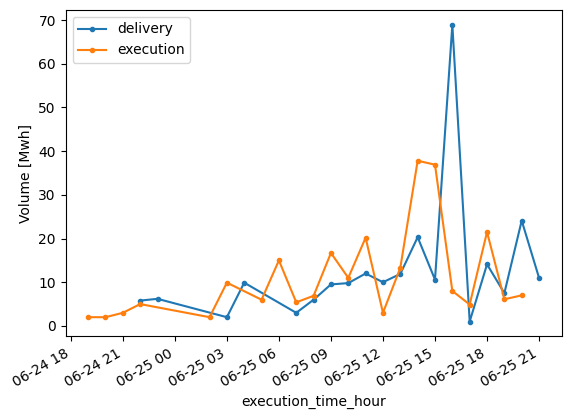

In [10]:
ax = df_trades.groupby('DeliveryStart')['Volume'].sum().plot(marker = '.')
df_trades.groupby('execution_time_hour')['Volume'].sum().plot(ax=ax, marker = '.')

ax.legend(['delivery', 'execution'])

ax.set_ylabel('Volume [Mwh]')

<AxesSubplot:xlabel='DeliveryStart'>

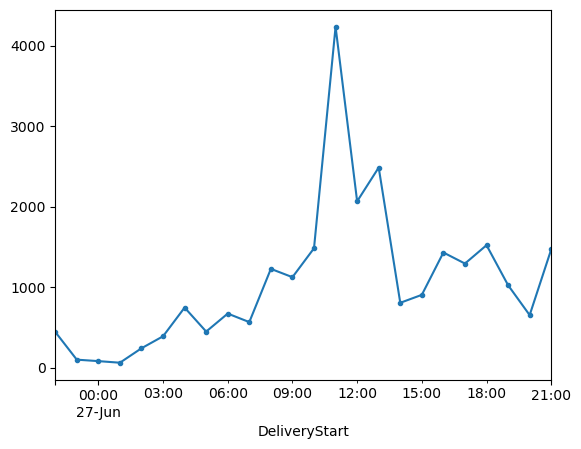

In [180]:
df_orders.groupby('DeliveryStart')['Volume'].sum().plot(marker = '.')

In [147]:
df_orders_vwap = df_orders.groupby(['execution_time_hour', 'DeliveryStart', 'Side'])[['price_tot', 'Volume']].sum()
df_orders_vwap['vwap'] = df_orders_vwap['price_tot'].div(df_orders_vwap['Volume'])

df_orders_vwap = df_orders_vwap.unstack()
df_orders_vwap.columns  = ['_'.join(col) for col in df_orders_vwap.columns.values]

df_orders_vwap

price_tot_BUY  \
execution_time_hour       DeliveryStart                              
2021-06-26 13:00:00+00:00 2021-06-26 22:00:00+00:00            NaN   
                          2021-06-26 23:00:00+00:00            NaN   
                          2021-06-27 00:00:00+00:00            NaN   
                          2021-06-27 01:00:00+00:00            NaN   
                          2021-06-27 02:00:00+00:00            NaN   
...                                                            ...   
2021-06-27 18:00:00+00:00 2021-06-27 19:00:00+00:00            NaN   
                          2021-06-27 21:00:00+00:00            NaN   
2021-06-27 19:00:00+00:00 2021-06-27 20:00:00+00:00         28.765   
                          2021-06-27 21:00:00+00:00            NaN   
2021-06-27 20:00:00+00:00 2021-06-27 21:00:00+00:00            NaN   

                                                     price_tot_SELL  \
execution_time_hour       DeliveryStart                               
2021-06-26 13:00:00+00:00 2021-06-26 22:00:00+00:00        1546.000   
                          2021-06-26 23:00:00+00:00        1510.000   
                          2021-06-27 00:00:00+00:00        1447.600   
                          2021-06-27 01:00:00+00:00        1411.600   
                          2021-06-27 02:00:00+00:00         757.300   
...                                                             ...   
2021-06-27 18:00:00+00:00 2021-06-27 19:00:00+00:00         181.150   
                          2021-06-27 21:00:00+00:00        8708.190   
2021-06-27 19:00:00+00:00 2021-06-27 20:00:00+00:00         177.500   
                          2021-06-27 21:00:00+00:00        1209.030   
2021-06-27 20:00:00+00:00 2021-06-27 21:00:00+00:00         658.062   

                                                     Volume_BUY  Volume_SELL  \
execution_time_hour       DeliveryStart                                        
2021-06-26 13:00:00+00:00 2021-06-26 22:00:00+00:00         NaN         45.0   
                          2021-06-26 23:00:00+00:00         NaN         45.0   
                          2021-06-27 00:00:00+00:00         NaN         45.0   
                          2021-06-27 01:00:00+00:00         NaN         45.0   
                          2021-06-27 02:00:00+00:00         NaN         25.0   
...                                                         ...          ...   
2021-06-27 18:00:00+00:00 2021-06-27 19:00:00+00:00         NaN          5.0   
                          2021-06-27 21:00:00+00:00         NaN        361.0   
2021-06-27 19:00:00+00:00 2021-06-27 20:00:00+00:00         1.1          5.0   
                          2021-06-27 21:00:00+00:00         NaN         61.0   
2021-06-27 20:00:00+00:00 2021-06-27 21:00:00+00:00         NaN         22.4   

                                                     vwap_BUY  vwap_SELL  
execution_time_hour       DeliveryStart                                   
2021-06-26 13:00:00+00:00 2021-06-26 22:00:00+00:00       NaN  34.355556  
                          2021-06-26 23:00:00+00:00       NaN  33.555556  
                          2021-06-27 00:00:00+00:00       NaN  32.168889  
                          2021-06-27 01:00:00+00:00       NaN  31.368889  
                          2021-06-27 02:00:00+00:00       NaN  30.292000  
...                                                       ...        ...  
2021-06-27 18:00:00+00:00 2021-06-27 19:00:00+00:00       NaN  36.230000  
                          2021-06-27 21:00:00+00:00       NaN  24.122410  
2021-06-27 19:00:00+00:00 2021-06-27 20:00:00+00:00     26.15  35.500000  
                          2021-06-27 21:00:00+00:00       NaN  19.820164  
2021-06-27 20:00:00+00:00 2021-06-27 21:00:00+00:00       NaN  29.377768  

[200 rows x 6 columns]

In [148]:
df_intraday = pd.merge(df_orders_vwap, df_trades_vwap, left_index=True, right_index=True, how = 'outer', suffixes=('_orders', '_trades')).reset_index()
df_intraday['DeliveryStart'] = df_intraday['DeliveryStart'].dt.tz_localize(None)
df_intraday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   execution_time_hour    200 non-null    datetime64[ns, UTC]
 1   DeliveryStart          200 non-null    datetime64[ns]     
 2   price_tot_BUY_orders   84 non-null     float64            
 3   price_tot_SELL_orders  186 non-null    float64            
 4   Volume_BUY_orders      84 non-null     float64            
 5   Volume_SELL_orders     186 non-null    float64            
 6   vwap_BUY_orders        82 non-null     float64            
 7   vwap_SELL_orders       185 non-null    float64            
 8   price_tot_BUY_trades   49 non-null     float64            
 9   price_tot_SELL_trades  43 non-null     float64            
 10  Volume_BUY_trades      49 non-null     float64            
 11  Volume_SELL_trades     43 non-null     float64            

In [149]:
df_all = pd.merge(df_intraday, df_dayahead_price.rename('price_day_ahead'), left_on = 'DeliveryStart', right_index=True).replace(0,np.nan)
df_all = df_all.set_index(['execution_time_hour', 'DeliveryStart'])[['vwap_SELL_trades', 'vwap_BUY_trades','vwap_SELL_orders', 'vwap_BUY_orders', 'price_day_ahead']]
df_all.head()

,,vwap_SELL_trades,vwap_BUY_trades,vwap_SELL_orders,vwap_BUY_orders,price_day_ahead
execution_time_hour,DeliveryStart,,,,,
2021-06-26 13:00:00+00:00,2021-06-26 22:00:00,NaN,NaN,34.355556,NaN,32.12
2021-06-26 18:00:00+00:00,2021-06-26 22:00:00,NaN,NaN,29.642632,19.739808,32.12
2021-06-26 19:00:00+00:00,2021-06-26 22:00:00,24.011429,21.94,25.961638,19.560134,32.12
2021-06-26 21:00:00+00:00,2021-06-26 22:00:00,NaN,NaN,30.860000,NaN,32.12
2021-06-26 13:00:00+00:00,2021-06-26 23:00:00,NaN,NaN,33.555556,NaN,30.39


<AxesSubplot:xlabel='execution_time_hour'>

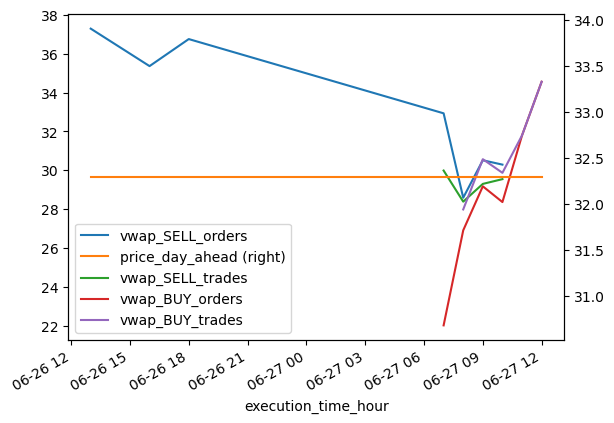

In [150]:
df_all.stack().unstack(level= [1,2])['2021-06-27 13:00:00'].dropna(how='all').plot(secondary_y = 'price_day_ahead')

DeliveryStart,2021-06-26 22:00:00,2021-06-26 23:00:00,2021-06-27 00:00:00,2021-06-27 01:00:00,2021-06-27 02:00:00,2021-06-27 03:00:00,2021-06-27 04:00:00,2021-06-27 05:00:00,2021-06-27 06:00:00,2021-06-27 07:00:00,...,2021-06-27 12:00:00,2021-06-27 13:00:00,2021-06-27 14:00:00,2021-06-27 15:00:00,2021-06-27 16:00:00,2021-06-27 17:00:00,2021-06-27 18:00:00,2021-06-27 19:00:00,2021-06-27 20:00:00,2021-06-27 21:00:00
execution_time_hour,,,,,,,,,,,,,,,,,,,,,
2021-06-26 13:00:00+00:00,34.355556,33.555556,32.168889,31.368889,30.292000,31.692000,35.692,35.568889,37.268889,38.692000,...,35.768889,37.293333,39.768889,40.292000,40.292000,40.268889,39.968889,39.892000,38.968889,37.768889
2021-06-26 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.365000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 18:00:00+00:00,29.642632,30.522500,29.086667,28.460000,27.160000,28.560000,32.560,32.745000,34.360000,35.570000,...,32.893333,36.756667,36.860000,37.160000,37.160000,37.360000,37.060000,36.760000,36.145000,34.945000
2021-06-26 19:00:00+00:00,25.961638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 20:00:00+00:00,NaN,29.271250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 21:00:00+00:00,30.860000,30.070000,28.800000,28.400000,27.100000,28.500000,32.500,32.770000,34.300000,35.520000,...,NaN,NaN,36.800000,37.100000,37.100000,37.300000,37.000000,36.700000,36.170000,34.970000
2021-06-26 22:00:00+00:00,NaN,NaN,NaN,NaN,24.490000,25.990000,29.990,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 23:00:00+00:00,NaN,NaN,NaN,NaN,24.436875,25.990000,29.990,30.090000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-27 00:00:00+00:00,NaN,NaN,NaN,NaN,21.465701,19.523563,29.340,NaN,36.334681,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


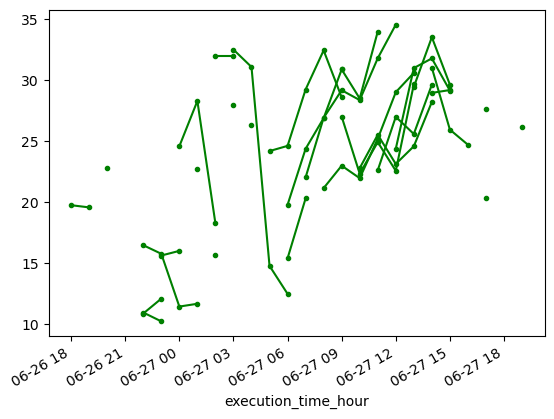

In [151]:
import matplotlib.pyplot as plt

f,ax = plt.subplots()

df_all[['vwap_SELL_trades', 'vwap_BUY_trades','vwap_SELL_orders', 'vwap_BUY_orders']]['vwap_BUY_orders'].unstack().plot(legend=False, ax=ax, color='green', marker = '.')
df_all[['vwap_SELL_trades', 'vwap_BUY_trades','vwap_SELL_orders', 'vwap_BUY_orders']]['vwap_SELL_orders'].unstack()#.plot(legend=False, ax=ax, color = 'red', marker = '.')

Side,SELL,BUY
ExecutionTime,,
2021-06-27 05:00:40.219000+00:00,23.99,NaN
2021-06-27 05:07:38.553000+00:00,25.49,NaN
2021-06-27 05:07:55.909000+00:00,25.79,NaN
2021-06-27 05:18:22.559000+00:00,NaN,24.37
2021-06-27 05:20:58.476000+00:00,NaN,24.01
...,...,...
2021-06-27 07:50:58.111000+00:00,NaN,30.81
2021-06-27 07:51:38.993000+00:00,31.29,NaN
2021-06-27 07:52:36.226000+00:00,31.29,NaN


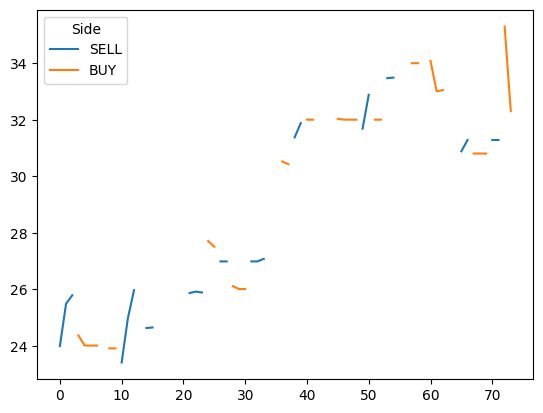

In [111]:
df_trades_selection = df_trades.groupby(['ExecutionTime', 'DeliveryStart','Side'])['Price'].mean().unstack(level=[1,2])['2021-06-27T11:00:00Z']
df_trades_selection.dropna(how = 'all').reset_index(drop=True).plot()

df_trades_selection.dropna(how='all')
#ax.set_ylim([0,20000])

In [75]:
df_orders = pd.read_csv('Continuous_Orders-SE3-20210627-20210628T043015000Z.csv', header=1)
df_orders['CreationTime'] = pd.to_datetime(df_orders['CreationTime'])
df_orders['TransactionTime'] = pd.to_datetime(df_orders['TransactionTime'])
df_orders.head(1).T

,0
OrderId,11594100818
InitialId,11594100818
ParentId,NaN
Side,SELL
Product,XBID_Hour_Power
DeliveryStart,2021-06-26T22:00:00Z
DeliveryEnd,2021-06-26T23:00:00Z
CreationTime,2021-06-26 12:56:15.823000+00:00
DeliveryArea,SE3
ExecutionRestriction,NON


In [76]:
df_orders.groupby('DeliveryStart')['DeliveryStart'].count()

DeliveryStart
2021-06-26T22:00:00Z     216
2021-06-26T23:00:00Z      34
2021-06-27T00:00:00Z      16
2021-06-27T01:00:00Z      12
2021-06-27T02:00:00Z     127
2021-06-27T03:00:00Z     150
2021-06-27T04:00:00Z     264
2021-06-27T05:00:00Z     196
2021-06-27T06:00:00Z     280
2021-06-27T07:00:00Z     218
2021-06-27T08:00:00Z     452
2021-06-27T09:00:00Z     572
2021-06-27T10:00:00Z     697
2021-06-27T11:00:00Z    2042
2021-06-27T12:00:00Z    1026
2021-06-27T13:00:00Z    1183
2021-06-27T14:00:00Z     330
2021-06-27T15:00:00Z     328
2021-06-27T16:00:00Z     677
2021-06-27T17:00:00Z     686
2021-06-27T18:00:00Z     605
2021-06-27T19:00:00Z     364
2021-06-27T20:00:00Z     258
2021-06-27T21:00:00Z     505
Name: DeliveryStart, dtype: int64

<AxesSubplot: >

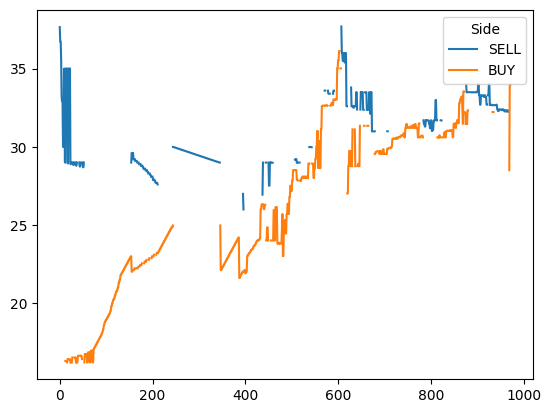

In [117]:
df_orders_selection = df_orders.groupby(['TransactionTime', 'DeliveryStart','Side'])['Price'].mean().unstack(level=[1,2])['2021-06-27T12:00:00Z']
df_orders_selection.dropna(how = 'all').reset_index(drop=True).plot()
#ax.set_ylim([0,20000])

<AxesSubplot: xlabel='TradeTime'>

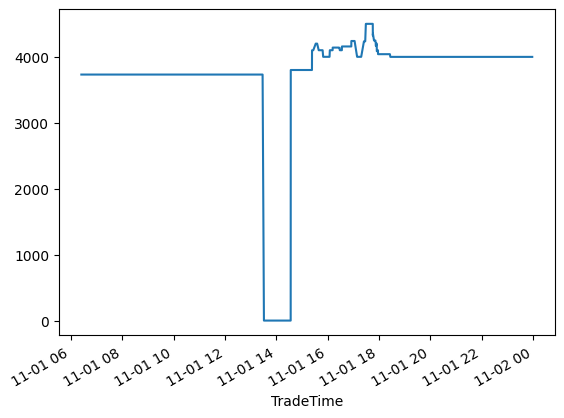

In [50]:
df_trades.groupby(['TradeTime', 'DisplayName'])['BuyUnitPrice'].mean().unstack()['PH-20191101-21'].ffill().plot()